In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
# Define the paths to the image folders
pumpkin_folder = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/Pumpkin'
carrot_folder = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/Carrot'

In [3]:
# Define the target size for resizing
target_size = (100, 100)

In [4]:
# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.jpg'):
            # Read the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Convert the image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize the image
            resized_img = cv2.resize(gray_img, target_size)

            # Append the image and label to the lists
            images.append(resized_img)
            labels.append(label)

    return images, labels


In [5]:
# Load and preprocess pumpkin images (label: 0)
pumpkin_images, pumpkin_labels = load_and_preprocess_images(pumpkin_folder, 0)

100%|██████████| 1000/1000 [00:17<00:00, 56.43it/s]


In [6]:
# Load and preprocess carrot images (label: 1)
carrot_images, carrot_labels = load_and_preprocess_images(carrot_folder, 1)

100%|██████████| 1000/1000 [00:13<00:00, 75.91it/s]


In [7]:
# Merge the lists
all_images = pumpkin_images + carrot_images
all_labels = pumpkin_labels + carrot_labels

In [8]:
# Convert lists to numpy arrays
x = np.array(all_images)
y = np.array(all_labels)

In [9]:
# Shuffle the data (if needed)
shuffle_indices = np.arange(x.shape[0])
np.random.shuffle(shuffle_indices)

x = x[shuffle_indices]
y = y[shuffle_indices]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [12]:
# Convert labels to categorical by encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [13]:
# Shuffle the training data
x_train, y_train = shuffle(x_train, y_train, random_state=42)


In [14]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout layer for regularization
model.add(layers.Dense(2, activation='softmax'))  # Output layer with 2 units for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [15]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2  # Split a portion of the training data for validation
)

Epoch 1/100
45/45 [==============================] - 13s 18ms/step - loss: 5.0433 - accuracy: 0.6403 - val_loss: 0.5301 - val_accuracy: 0.7611
Epoch 2/100
45/45 [==============================] - 1s 12ms/step - loss: 0.3668 - accuracy: 0.8507 - val_loss: 0.3899 - val_accuracy: 0.7889
Epoch 3/100
45/45 [==============================] - 1s 12ms/step - loss: 0.2245 - accuracy: 0.9181 - val_loss: 0.0418 - val_accuracy: 0.9889
Epoch 4/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0818 - accuracy: 0.9743 - val_loss: 0.0281 - val_accuracy: 0.9944
Epoch 5/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0429 - accuracy: 0.9896 - val_loss: 0.0298 - val_accuracy: 0.9917
Epoch 6/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0331 - val_accuracy: 0.9917
Epoch 7/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0212 - accuracy: 0.9917 - val_loss: 0.0335 - val_accuracy: 0.9944
Epoch

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

7/7 [==============================] - 0s 5ms/step - loss: 1.4265e-04 - accuracy: 1.0000
Test Accuracy: 1.0


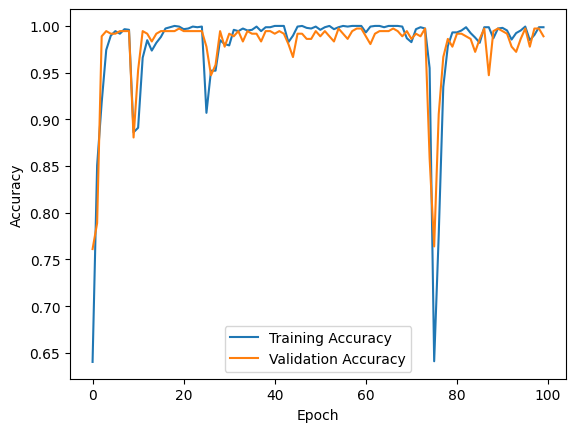

In [17]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
# Path to the new image (replace with the actual path)
new_image_path1 = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/0118.jpg'
new_image_path2 = '/content/drive/MyDrive/Assignment CNN Vegetable Identification/1142.jpg'

In [19]:
# Load and preprocess a new image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (100, 100))
    return resized_img.reshape((1, 100, 100, 1))

In [28]:
# Preprocess the image
new_image1 = preprocess_image(new_image_path1)

In [29]:
# Make predictions using the trained model
predictions = model.predict(new_image1)


1/1 [==============================] - 0s 17ms/step


In [30]:
# Interpret the predictions
class_labels = ['Pumpkin', 'Carrot']
predicted_class = np.argmax(predictions)
print(predicted_class)
print(f'The model predicts that the image is a {class_labels[predicted_class]}')

1
The model predicts that the image is a Carrot


In [31]:
# Preprocess the image
new_image2 = preprocess_image(new_image_path2)

In [32]:
# Make predictions using the trained model
predictions = model.predict(new_image2)

1/1 [==============================] - 0s 16ms/step


In [33]:
# Interpret the predictions
class_labels = ['Pumpkin', 'Carrot']
predicted_class = np.argmax(predictions)
print(predicted_class)
print(f'The model predicts that the image is a {class_labels[predicted_class]}')

0
The model predicts that the image is a Pumpkin
